In [1]:
%matplotlib inline
import numpy as np
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import sys
import random
import matplotlib.pylab as plt
chromedriver = "/Users/benwang/anaconda2/envs/python3.5/chromedriver"

In [2]:
driver = webdriver.Chrome(chromedriver)
sourceurl ='https://twitter.com/search?f=tweets&vertical=default&q=%23surprise&src=tyah'
driver.get(sourceurl)


In [3]:
soap = driver.page_source
soap = BeautifulSoup(soap,from_encoding="UTF-8")
alldata = soap.findAll("a",{"class":"tweet-timestamp js-permalink js-nav js-tooltip"})

/Users/benwang/anaconda2/envs/python3.5/lib/python3.5/site-packages/bs4/__init__.py:146: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")
/Users/benwang/anaconda2/envs/python3.5/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/benwang/anaconda2/envs/python3.5/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup

In [4]:
a = time.time()
new = driver.page_source
b = time.time()
print(b-a)
new1 = BeautifulSoup(new,from_encoding="UTF-8")
c = time.time()
print(c-b)
alldata = new1.findAll("a",{"class":"tweet-timestamp js-permalink js-nav js-tooltip"})
d = time.time()
print(d-c)

0.04849815368652344


/Users/benwang/anaconda2/envs/python3.5/lib/python3.5/site-packages/bs4/__init__.py:146: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")
/Users/benwang/anaconda2/envs/python3.5/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/benwang/anaconda2/envs/python3.5/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup

0.27799081802368164
0.06662416458129883


In [ ]:
j = 0
k = 0
x = 0
m = 0
timesavetime = 1
timeplt = []
timelist = []
datasize = []
firsttime = time.time()
for i in range(7000):
    x=1
    driver.implicitly_wait(5)
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight)')

    a2 = list(alldata[len(alldata)-1].get('title'))
    c2 =''.join(a2[9:20])#目前最後一筆
   
    d = len(alldata) #目前資料長度
    j += 1
    k += 1
    if d > 8000 :#'2016年12月31日' in timelist :
        a1 = time.strftime("%Y-%m-%d %H:%M:%S")
        print('開始爬蟲...'+'開始時間＝'+a1)
        tStart = time.time()
        final = driver.page_source
        finalbt = BeautifulSoup(final,from_encoding="UTF-8")    
        #取得內文
        mydivs = finalbt.findAll("div",{"class":"js-tweet-text-container"})
        #取得PO文日期
        alldata = finalbt.findAll("a",{"class":"tweet-timestamp js-permalink js-nav js-tooltip"})
        tcrawl = time.time()
        print ('It cost{}sec'.format(tcrawl - tStart))
        for crawling in range(len(mydivs)):  
                if crawling+1 == len(mydivs):
                    a2 = time.strftime("%Y-%m-%d %H:%M:%S")
                    print('結束時間='+a2)
                    tEnd = time.time()
                    print ('It cost{}sec'.format(tEnd - tStart))
                    print('總耗時{}'.format(tEnd-firsttime))
                    plt.plot(datasize,timeplt)
                    sys.exit()
                else:
                    data = str(mydivs[crawling])
                    data_text = mydivs[crawling].text
                    time_text = alldata[crawling].get('title')
                    fo = open("joy_hastag.json", "a")
                    fo.write(str(crawling)+str(time_text)+ data_text)
                    fo.close()
    x=2
    if  d > 1000:#重新抓取網頁，第一次100筆會停一次，因為當時資料已經跑超過1000，但可能只有1000初頭，
        e = 100 #所以就不會再有下一個100去重整，但len(alldata) 應該會每次跟新，但i不會，設定一個計數器j
    else:
        e = 20
    
    if timesavetime == 1:
        timelist = []
    for l in range(d):
        z = list(alldata[(l)].get('title'))
        c1 =''.join(z[9:20])#目前最所有資料時間
        timelist.append(c1)
    timesavetime = 0
    
    sys.stdout.write('爬蟲中...目前日期：{}，總數{}次...{}％\r'.format(c1,j,str((k/e)*100))) #可顯示爬蟲中...比例變動
    sys.stdout.flush()
    time.sleep(1)
   
    if j%e == 0: 
        x = 3
        k = 0 #翻滾頁面重計
        timesavetime = 1 #重新儲存時間
        m += 1
        print(k)
        tS = time.time()
        if len(alldata)<1000:
            x = 4
            soap = driver.page_source
            x = 5
            soap = BeautifulSoup(soap,from_encoding="UTF-8")
            x = 6
            alldata = soap.findAll("a",{"class":"tweet-timestamp js-permalink js-nav js-tooltip"})
            x = 7
        elif 2000>len(alldata)>1000: 
            print('測試')
            x = 8
            ndata = driver.page_source
            x = 9
            ndata = BeautifulSoup(ndata,from_encoding="UTF-8")
            x = 10
            alldata = ndata.findAll("a",{"class":"tweet-timestamp js-permalink js-nav js-tooltip"})
            x = 11
        elif 4000>len(alldata)>2000:
            x = 12
            data4 = driver.page_source
            x = 13
            data4 = BeautifulSoup(data4,from_encoding="UTF-8")
            x = 14
            alldata = data4.findAll("a",{"class":"tweet-timestamp js-permalink js-nav js-tooltip"})
            x = 15
        elif 6000>len(alldata)>4000:
            x = 16
            data6 = driver.page_source
            x = 17
            data6 = BeautifulSoup(data6,from_encoding="UTF-8")
            x = 18
            alldata = data6.findAll("a",{"class":"tweet-timestamp js-permalink js-nav js-tooltip"})
            x = 19
        elif 7000>len(alldata)>6000:
            x = 20
            data8 = driver.page_source
            x = 21
            data8 = BeautifulSoup(data8,from_encoding="UTF-8")
            x = 22
            alldata = data8.findAll("a",{"class":"tweet-timestamp js-permalink js-nav js-tooltip"})
            x = 23
        elif 8000>len(alldata)>7000:
            x = 20
            data9 = driver.page_source
            x = 21
            data9 = BeautifulSoup(data9,from_encoding="UTF-8")
            x = 22
            alldata = data9.findAll("a",{"class":"tweet-timestamp js-permalink js-nav js-tooltip"})
            x = 23
        elif 9000>len(alldata)>8000:
            x = 20
            data10 = driver.page_source
            x = 21
            data10 = BeautifulSoup(data10,from_encoding="UTF-8")
            x = 22
            alldata = data10.findAll("a",{"class":"tweet-timestamp js-permalink js-nav js-tooltip"})
            x = 23
        elif 10000>len(alldata)>9000:
            x = 20
            data11 = driver.page_source
            x = 21
            data11 = BeautifulSoup(data11,from_encoding="UTF-8")
            x = 22
            alldata = data11.findAll("a",{"class":"tweet-timestamp js-permalink js-nav js-tooltip"})
            x = 23
        elif 11000>len(alldata)>10000:
            x = 20
            data12 = driver.page_source
            x = 21
            data12 = BeautifulSoup(data12,from_encoding="UTF-8")
            x = 22
            alldata = data12.findAll("a",{"class":"tweet-timestamp js-permalink js-nav js-tooltip"})
            x = 23
        else :
            x = 24
            data12 = driver.page_source
            x = 25
            data12 = BeautifulSoup(data12,from_encoding="UTF-8")
            x = 26
            alldata = data12.findAll("a",{"class":"tweet-timestamp js-permalink js-nav js-tooltip"})
            x = 27
            
        tE = time.time()
        a2 = list(alldata[len(alldata)-1].get('title'))
        c = ''.join(a2[9:20])
        b2 = time.strftime("%Y-%m-%d %H:%M:%S")
        print('即---時---時---間---{}'.format(b2))
        print('目前最後一筆日期：'+c)
        print('目前資料{}筆'.format(d))
        print('花費時間{}秒'.format(tE-tS))
        print('目前每{}筆重整一次'.format(e))
        timeplt.append(tE-tS)
        datasize.append(d)
        x = 0

0蟲中...目前日期：2018年2月24日，總數20次...100.0％00000000001％


/Users/benwang/anaconda2/envs/python3.5/lib/python3.5/site-packages/bs4/__init__.py:146: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")
/Users/benwang/anaconda2/envs/python3.5/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/benwang/anaconda2/envs/python3.5/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup

即---時---時---間---2018-02-25 12:54:05
目前最後一筆日期： 2018年2月23日
目前資料20筆
花費時間4.454837083816528秒
目前每20筆重整一次
0蟲中...目前日期： 2018年2月23日，總數40次...100.0％00000000001％
即---時---時---間---2018-02-25 12:54:36
目前最後一筆日期：2018年2月22日
目前資料370筆
花費時間7.286395072937012秒
目前每20筆重整一次
0蟲中...目前日期：2018年2月22日，總數60次...100.0％00000000001％
即---時---時---間---2018-02-25 12:55:04
目前最後一筆日期：2018年2月22日
目前資料566筆
花費時間7.015703916549683秒
目前每20筆重整一次
0蟲中...目前日期：2018年2月22日，總數80次...100.0％00000000001％
即---時---時---間---2018-02-25 12:55:31
目前最後一筆日期：2018年2月22日
目前資料566筆
花費時間7.28764009475708秒
目前每20筆重整一次
0蟲中...目前日期：2018年2月22日，總數100次...100.0％0000000001％
即---時---時---間---2018-02-25 12:55:59
目前最後一筆日期：2018年2月22日
目前資料566筆
花費時間7.599386215209961秒
目前每20筆重整一次
0蟲中...目前日期：2018年2月22日，總數120次...100.0％00000000001％
即---時---時---間---2018-02-25 12:56:27
目前最後一筆日期：2018年2月22日
目前資料566筆
花費時間7.48557710647583秒
目前每20筆重整一次
0蟲中...目前日期：2018年2月22日，總數140次...100.0％00000000001％
即---時---時---間---2018-02-25 12:56:55
目前最後一筆日期：2018年2月22日
目前資料566筆
花費時間7.69091010093689秒
目前每20筆重整一次
0蟲中...目前日期：20

0蟲中...目前日期：2018年2月22日，總數1120次...100.0％00000000001％
即---時---時---間---2018-02-25 13:19:35
目前最後一筆日期：2018年2月22日
目前資料566筆
花費時間7.943825960159302秒
目前每20筆重整一次
0蟲中...目前日期：2018年2月22日，總數1140次...100.0％00000000001％
即---時---時---間---2018-02-25 13:20:03
目前最後一筆日期：2018年2月22日
目前資料566筆
花費時間7.712032794952393秒
目前每20筆重整一次
0蟲中...目前日期：2018年2月22日，總數1160次...100.0％00000000001％
即---時---時---間---2018-02-25 13:20:31
目前最後一筆日期：2018年2月22日
目前資料566筆
花費時間7.570839166641235秒
目前每20筆重整一次
0蟲中...目前日期：2018年2月22日，總數1180次...100.0％00000000001％
即---時---時---間---2018-02-25 13:20:58
目前最後一筆日期：2018年2月22日
目前資料566筆
花費時間6.9303138256073秒
目前每20筆重整一次
0蟲中...目前日期：2018年2月22日，總數1200次...100.0％00000000001％
即---時---時---間---2018-02-25 13:21:26
目前最後一筆日期：2018年2月22日
目前資料566筆
花費時間7.509968996047974秒
目前每20筆重整一次
0蟲中...目前日期：2018年2月22日，總數1220次...100.0％00000000001％
即---時---時---間---2018-02-25 13:21:55
目前最後一筆日期：2018年2月22日
目前資料566筆
花費時間7.9937310218811035秒
目前每20筆重整一次
0蟲中...目前日期：2018年2月22日，總數1240次...100.0％00000000001％
即---時---時---間---2018-02-25 13:22:22
目前最後一筆日期：2018年

In [10]:
for i in range(100):
    x=1
    driver.implicitly_wait(5)
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight)')

In [122]:
if '2018年2月1日' in timelist:
    print('true')
else:
    print('no')

true


In [15]:
alldata[1].get('title')

'上午6:18 - 2018年2月14日'

In [241]:
for j in range(10):
        driver.implicitly_wait(20)
        driver.execute_script('window.scrollTo(5, document.body.scrollHeight)')
        print('第{}輪'.format(j+1))    

第1輪
第2輪
第3輪
第4輪
第5輪
第6輪
第7輪
第8輪
第9輪
第10輪


In [6]:
a1 = list(alldata[len(alldata)-1].get('title'))
a2 = list(alldata[len(alldata)-3].get('title'))
a3 = list(alldata[len(alldata)-6].get('title'))
c1 =''.join(a1[9:20])#目前最後一筆資料時間
c2 =''.join(a2[9:20])
c3 =''.join(a3[9:20])
timelist = [c1,c2,c3]

timelist

['2018年2月2日', '2018年2月2日', '2018年2月2日']

In [13]:
len(alldata)

6754

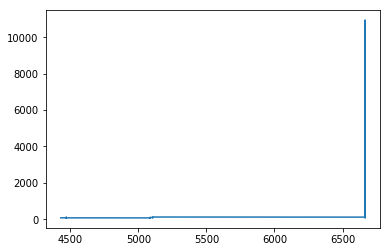

In [14]:
plt.plot(datasize,timeplt)

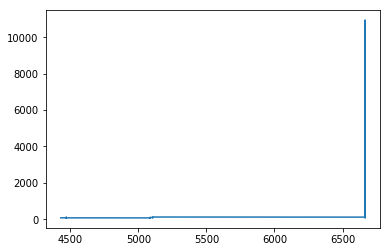

In [12]:
plt.plot(datasize,timeplt)

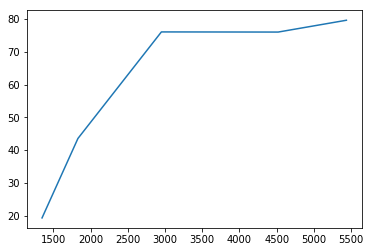

In [47]:
plt.plot(datasize,timeplt)

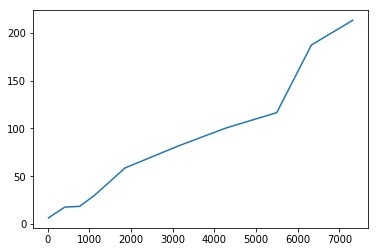

In [6]:
plt.plot(datasize,timeplt)

In [46]:
x

17

In [13]:
timelist = []
for l in range(d):
    
    z = list(alldata[(l)].get('title'))
    c1 =''.join(z[9:20])#目前最所有資料時間
    timelist.append(c1)


TypeError: 'NoneType' object is not iterable

In [40]:
timelist = []
for o in range(e):
    a1 = list(alldata[(len(alldata)-o)].get('title'))
    c1 =''.join(a1[9:20])#目前最所有資料時間
    timelist.append(c1)

IndexError: list index out of range

In [ ]:
timesavetime

In [6]:
len(alldata)

20

In [50]:
for o in range(10):
    a1 = list(alldata[(len(alldata)-(o+1))].get('title'))
    c1 =''.join(a1[9:20])
    bi.append(c1)

In [51]:
bi

['2018年2月14日',
 '2018年2月13日',
 '2018年2月13日',
 ' 2018年2月13日',
 ' 2018年2月13日',
 ' 2018年2月13日',
 ' 2018年2月13日',
 '2018年2月13日',
 '2018年2月13日',
 '2018年2月13日',
 '2018年2月13日']

In [14]:
x

1